In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Dropout, Flatten,BatchNormalization
from tensorflow.keras import optimizers
from keras.layers.advanced_activations import LeakyReLU
from keras_preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import Adam
from matplotlib.pyplot import imread, imshow, subplots, show
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

In [2]:
IMG_WIDTH=48
IMG_HEIGHT=48

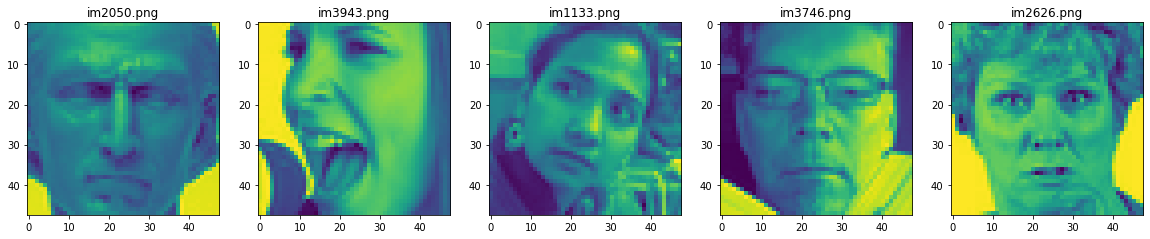

In [3]:
plt.figure(figsize=(20,20))
train_folder=r'C:\Users\ASUS\Desktop\Emotion Dataset\train\angry'
for i in range(5):
    file = random.choice(os.listdir(train_folder))
    image_path= os.path.join(train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

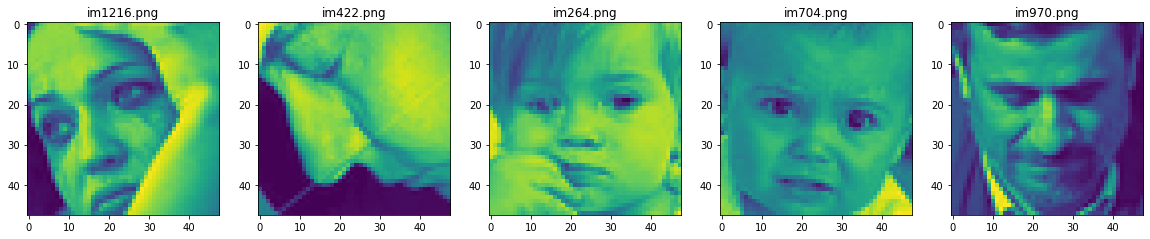

In [4]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\ASUS\Desktop\Emotion Dataset\test\sad'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, 0)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH,),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name
train_img_data, train_class_name =create_dataset(r'C:\Users\ASUS\Desktop\Emotion Dataset\train')

In [6]:
def create_test_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, 0)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH,),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name
test_img_data, test_class_name =create_dataset(r'C:\Users\ASUS\Desktop\Emotion Dataset\test')

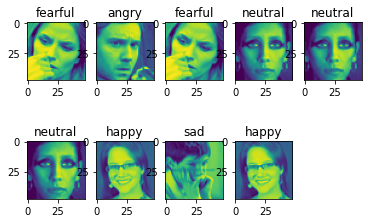

In [7]:
for i in range(9):
    class_names = random.choice(train_class_name)
    index=train_class_name.index(class_names)
    file=train_img_data[index]
    ax=plt.subplot(2,5,i+1)
    ax.title.set_text(class_names)
    plt.imshow(file)

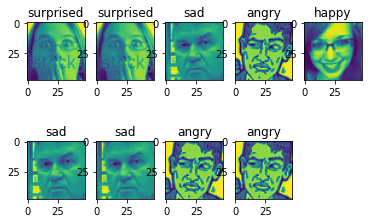

In [8]:
for i in range(9):
    class_names = random.choice(test_class_name)
    index=test_class_name.index(class_names)
    file=test_img_data[index]
    ax=plt.subplot(2,5,i+1)
    ax.title.set_text(class_names)
    plt.imshow(file)

In [9]:
train_img_data=np.array(train_img_data, np.float32)
train_img_data=train_img_data.reshape(-1, 48, 48, 1)
print(train_img_data.shape)

test_img_data=np.array(test_img_data, np.float32)
test_img_data=test_img_data.reshape(-1, 48, 48, 1)
print(test_img_data.shape)


(28273, 48, 48, 1)
(7067, 48, 48, 1)


In [10]:
train_dict={k: v for v, k in enumerate(np.unique(train_class_name))}
print(train_dict)
test_dict={k: v for v, k in enumerate(np.unique(test_class_name))}
print(test_dict)



{'angry': 0, 'fearful': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprised': 5}
{'angry': 0, 'fearful': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprised': 5}


In [11]:
train_target_val=  [train_dict[train_class_name[i]] for i in range(len(train_class_name))]
test_target_val=  [test_dict[test_class_name[i]] for i in range(len(test_class_name))]

In [12]:
num_classes=len(np.unique(train_target_val))
input_shape=(IMG_WIDTH,IMG_HEIGHT,1)
print(num_classes)
train_y=np.array(list(map(int,train_target_val)))
test_y=np.array(list(map(int,test_target_val)))

6


In [37]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.4))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
# model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 23, 23, 32)        4128      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)       

In [39]:
history = model.fit(x=train_img_data, y=train_y,batch_size = 32,epochs = 20,verbose=1,validation_data=(test_img_data, test_y,))

Epoch 1/20
884/884 [==============================] - 222s 251ms/step - loss: 4.3380 - accuracy: 0.2921 - val_loss: 1.6653 - val_accuracy: 0.3730
Epoch 2/20
884/884 [==============================] - 231s 261ms/step - loss: 1.6157 - accuracy: 0.3765 - val_loss: 1.5609 - val_accuracy: 0.4070
Epoch 3/20
884/884 [==============================] - 233s 264ms/step - loss: 1.5414 - accuracy: 0.4171 - val_loss: 1.4953 - val_accuracy: 0.4378
Epoch 4/20
884/884 [==============================] - 228s 258ms/step - loss: 1.4951 - accuracy: 0.4393 - val_loss: 1.4723 - val_accuracy: 0.4479
Epoch 5/20
884/884 [==============================] - 227s 257ms/step - loss: 1.4572 - accuracy: 0.4641 - val_loss: 1.4743 - val_accuracy: 0.4462
Epoch 6/20
884/884 [==============================] - 228s 258ms/step - loss: 1.4229 - accuracy: 0.4786 - val_loss: 1.4443 - val_accuracy: 0.4709
Epoch 7/20
884/884 [==============================] - 228s 258ms/step - loss: 1.3951 - accuracy: 0.4958 - val_loss: 1.4234 -

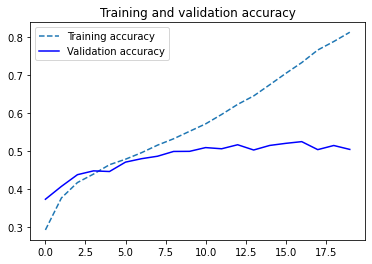

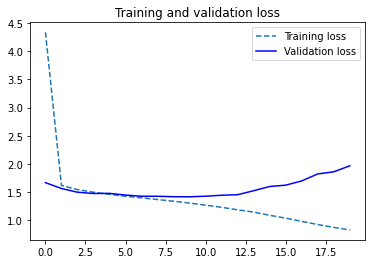

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()